In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

from sklearn.linear_model import LinearRegression

In [9]:
os.getcwd()

'/Users/SteveAhn/Downloads/1.DataAnalyst/Python/PythonData'

In [8]:
os.chdir(r"/Users/SteveAhn/Downloads/1.DataAnalyst/Python/PythonData")

Load the Data

In [10]:
raw_data = pd.read_csv("RealLifeEx.csv")

In [11]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Preprocessing & exploring descriptive statistics

In [15]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [18]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Dealing with missing data

In [21]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [22]:
data_no_mv = data.dropna(axis = 0)

In [23]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [27]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Exploring the PDFs

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


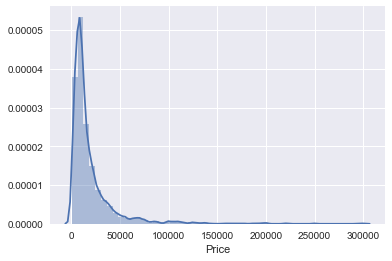

In [26]:
sns.distplot(data_no_mv['Price'])

Dealing with outliers - removing below the 99th percentile

In [35]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


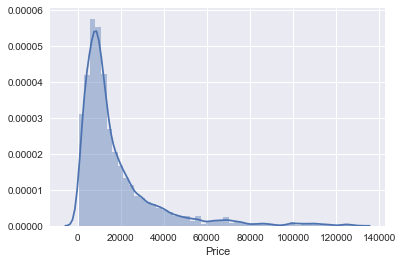

In [36]:
sns.distplot(data_1['Price'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


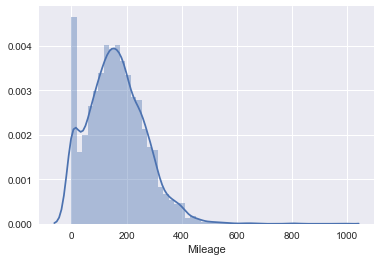

In [37]:
sns.distplot(data_no_mv['Mileage'])

In [44]:
Extract 99th percentile of Mileage

SyntaxError: invalid syntax (<ipython-input-44-0c172eaba109>, line 1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


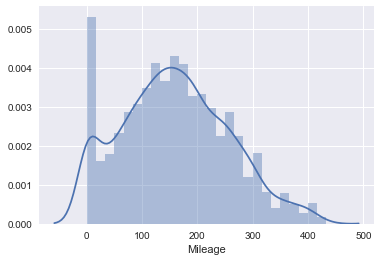

In [43]:
q1 = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage'] < q1]
sns.distplot(data_2['Mileage'])

Engine data cleaning

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


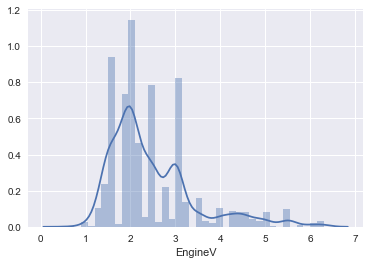

In [47]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.distplot(data_3['EngineV'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


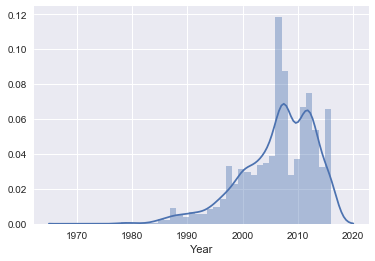

In [48]:
sns.distplot(data_no_mv['Year'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


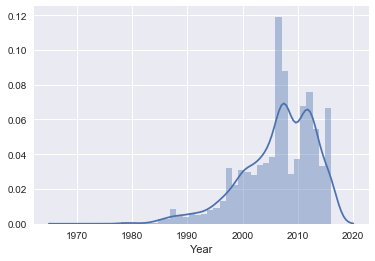

In [59]:
q2 = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q2]
sns.distplot(data_3['Year'])

In [60]:
data_cleaned = data_4.reset_index(drop = True)

In [62]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Checking the OLS Assumptions

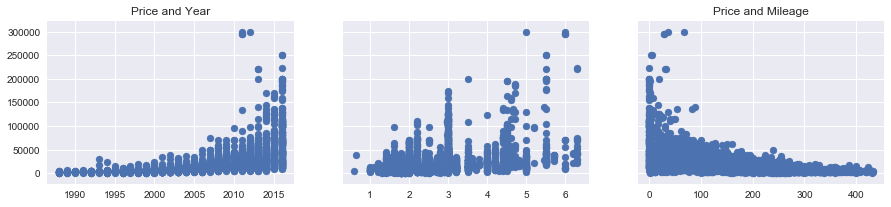

In [64]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

There are some found patterns that do not follow linearity and will need a possible log transformation and the Price variable does not follow normality

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


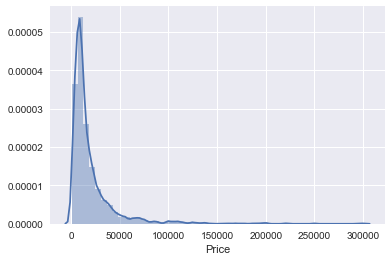

In [65]:
sns.distplot(data_cleaned['Price'])

Relaxing the assumptions

In [67]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned['log_price']

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
5       12.206068
6        9.560997
7        9.287209
8        7.244228
9        9.388487
10       7.824046
11       9.159047
12       9.259131
13       9.680344
14       9.059517
15       8.003029
16      10.184900
17       8.160518
18      10.551454
19       8.922658
20       8.824678
21       9.259131
22      10.122623
23       9.942708
24       8.779557
25       9.515322
26       9.047821
27       7.972466
28       9.975808
29       9.792556
          ...    
3877     9.179881
3878     9.259131
3879     9.296518
3880    10.146434
3881     9.648595
3882     9.185023
3883     9.686575
3884    12.611538
3885     9.126959
3886     8.546752
3887    11.512925
3888     9.104869
3889     9.729134
3890     9.011889
3891    10.124629
3892    11.302192
3893     8.895630
3894     9.968104
3895    10.714418
3896     8.817298
3897     8.853665
3898     9.400134
3899    10.236382
3900     7.649693
3901     8

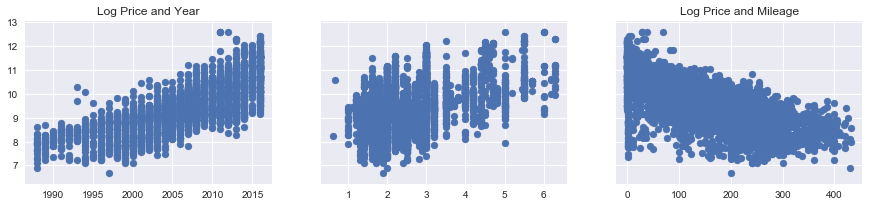

In [68]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

No serial correlation found, constant variance is present, and linearity is now found through the log transformation

Multicollinearity

In [69]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif= pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [73]:
vif

,VIF,features
0,3.703266,Mileage
1,10.323287,Year
2,7.400348,EngineV


We will use Vif > 5 as unacceptable, therefore the Year variable will be removed due to multicollinearity

In [74]:
data_no_mc = data_cleaned.drop(['Year'],axis = 1)

In [75]:
data_no_mc.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,9.444071
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,0.914405
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,8.892125
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,9.375855
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,9.998798


Create Dummy column variables from Categoricals

In [76]:
data_with_dummies = pd.get_dummies(data_no_mc, drop_first = True)

In [77]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Rearranging the data

In [85]:
data_with_dummies = data_with_dummies.drop(['Price'], axis = 1)

In [86]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [87]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [90]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Linear Regression Model

Declare the inputs and the targets

In [91]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

Scale the Data

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
inputs_scaled = scaler.transform(inputs)

Split into Training and Testing Data

In [95]:
 from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

Create the Regression

In [98]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
y_hat = reg.predict(x_train)

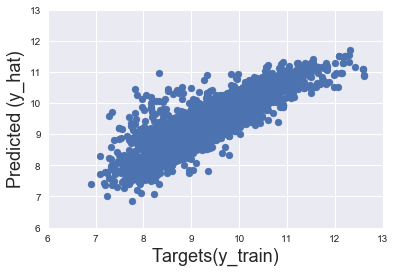

In [106]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size = 18)
plt.ylabel('Predicted (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Residuals PDF')

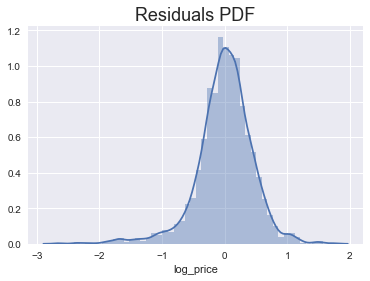

In [107]:
sns.distplot(y_train-y_hat)
plt.title("Residuals PDF", size = 18)

In [108]:
reg.score(x_train, y_train)

0.7520453281718504

Finding weights and bias

In [109]:
reg.intercept_

9.43753512973232

In [110]:
reg.coef_

array([-0.47713375,  0.25279341,  0.02659834,  0.03600588, -0.12726982,
       -0.16670307, -0.04848545, -0.07180363, -0.14024984, -0.09622117,
       -0.19162974, -0.10890609, -0.15699644, -0.12248327, -0.03067591,
       -0.14136631,  0.31071348])

In [112]:
reg_summary= pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.477134
1,EngineV,0.252793
2,Brand_BMW,0.026598
3,Brand_Mercedes-Benz,0.036006
4,Brand_Mitsubishi,-0.127270
5,Brand_Renault,-0.166703
6,Brand_Toyota,-0.048485
7,Brand_Volkswagen,-0.071804
8,Body_hatch,-0.140250
9,Body_other,-0.096221


'Audi' is the benchmark for the Weights used in categorical variables

In [113]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Testing

In [114]:
y_hat_test = reg.predict(x_test)

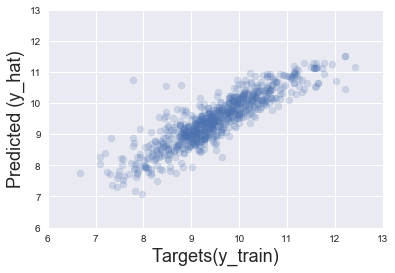

In [116]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets(y_train)', size = 18)
plt.ylabel('Predicted (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

In [120]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,2497.123713
1,7456.534893
2,13496.814274
3,7573.105796
4,16502.817902


In [122]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,2497.123713,NaN
1,7456.534893,7900.0
2,13496.814274,NaN
3,7573.105796,NaN
4,16502.817902,NaN


In [124]:
y_test = y_test.reset_index(drop = True)

In [126]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,2497.123713,1800.0
1,7456.534893,10800.0
2,13496.814274,14900.0
3,7573.105796,11000.0
4,16502.817902,16999.0


In [128]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']

In [130]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residuals,Difference%
0,2497.123713,1800.0,-697.123713,38.729095
1,7456.534893,10800.0,3343.465107,30.958010
2,13496.814274,14900.0,1403.185726,9.417354
3,7573.105796,11000.0,3426.894204,31.153584
4,16502.817902,16999.0,496.182098,2.918890
5,8782.094579,8900.0,117.905421,1.324780
6,36938.431408,107000.0,70061.568592,65.478101
7,5129.054009,6900.0,1770.945991,25.665884
8,19320.017790,35000.0,15679.982210,44.799949
9,10696.319898,19995.0,9298.680102,46.505027


In [131]:
 df_pf.describe()

,Predictions,Target,Residuals,Difference%
count,782.000000,782.000000,782.000000,782.000000
mean,17668.626792,20717.216803,3048.590012,35.024687
std,15260.172350,25654.851301,15487.661137,79.023527
min,1195.372625,800.000000,-44009.355675,0.044431
25%,7642.370756,7500.000000,-2106.719386,10.244297
50%,12647.391012,12500.000000,453.938710,23.326711
75%,22630.721407,23324.750000,3734.118831,38.876238
max,99473.692128,249999.000000,179168.433265,1833.723153


In [134]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by = ['Difference%'])

,Predictions,Target,Residuals,Difference%
54,32385.60,32400.00,14.40,0.04
662,46574.25,46500.00,-74.25,0.16
384,17600.14,17639.47,39.33,0.22
526,54866.55,55000.00,133.45,0.24
240,8278.72,8300.00,21.28,0.26
497,8323.24,8350.00,26.76,0.32
580,12944.41,12900.00,-44.41,0.34
270,18930.10,18999.00,68.90,0.36
607,32359.77,32500.00,140.23,0.43
565,12839.50,12900.00,60.50,0.47


After sorting by difference %, the last remaining datarows prove to show problems as it was not predicted properly and may indicate the need for more variables for lower priced cars.